<h1>Sentiment Analysis</h1>

There are two features
*  ‘Review’ - the sentence 
*  ‘Liked’ - the label for the review.( 1/ 0 or liked/ unliked)

Output:
 > 1 means positive review and 0 means negative review.


In [123]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV


In [145]:
# dataset loading
df = pd.read_csv('Restaurant_Reviews.csv',sep='\t')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [147]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


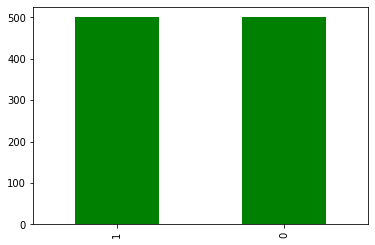

In [161]:
df['Liked'].value_counts().plot(kind = 'bar', color = 'g')

In [149]:
# Getting X, y
X = df['Review'].values
y = df['Liked'].values


In [150]:
# importing nltk
import nltk 
nltk.download('stopwords') #stopwords download
nltk.download('punkt') #tokenizer download
nltk.download('wordnet') #lemmatizer download

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [151]:
# stemming and lemmatization
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
new_stopword=stopwords.words('english')
new_stopword.remove('not')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [159]:
X_new = []
for _ in X:
  review = re.sub('[^a-zA-Z]',' ',_)
  review = review.lower()
  review = review.split()
  new_review = [lemmatizer.lemmatize(stemmer.stem(word)) for word in review if not word in new_stopword]
  new_review = ' '.join(new_review) 
  X_new.append(new_review)

In [153]:
# splitting dataset
X_train, X_test, y_train, y_test = tts(X_new,y, random_state = 1)

In [154]:
# pipling and fitting
param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0]}
model = make_pipeline(CountVectorizer(), GridSearchCV(LinearSVC(loss='hinge',random_state=1), param_grid))
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, voc...
                              estimator=LinearSVC(C=1.0, class_weight=None,
                                                  dual=True, fit_intercept=True,
                                                  intercept_scaling=1,
                                                  loss='hinge', max_iter=1000,
                             

In [155]:
y_pred = model.predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_pred, y_test)

0.812

In [157]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       137
           1       0.78      0.81      0.79       113

    accuracy                           0.81       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.81      0.81      0.81       250



In [158]:
# testing model manually
model.predict(['I really like the new design of your website!'])

array([1])